In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
names = ['Preg', 'Plas', 'Pres', 'Skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv('../dataset/pima-indians-diabetes.csv', names=names)

In [3]:
df.head()

,Preg,Plas,Pres,Skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
x = df.drop('class', axis=1)
y = df['class']

In [5]:
x_train1, x_test, y_train1, y_test = train_test_split(x, y, test_size=.20, random_state=1)

x_train, x_val, y_train, y_val = train_test_split(x_train1, y_train1, test_size=.20, random_state=1)

In [6]:
print('Total dataset ', len(x))
print('Train dataset ', len(x_train))
print('Test dataset ', len(x_test))
print('Validation dataset ', len(x_val))

Total dataset  768
Train dataset  491
Test dataset  154
Validation dataset  123


In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)

KNeighborsClassifier()

In [8]:
knn_clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': list(range(1, 11)),
    'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
    'weights': ('uniform', 'distance')
}

gs = GridSearchCV(knn_clf, param_grid, cv=20)
gs.fit(x_train, y_train)

GridSearchCV(cv=20, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ('uniform', 'distance')})

In [10]:
gs.best_params_

{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}

In [11]:
gs.cv_results_['params']

[{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'},
 {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'distance'},
 {'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'uniform'},
 {'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'distance'},
 {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'},
 {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'},
 {'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'uniform'},
 {'algorithm': 'auto', 'n_neighbors': 4, 'weights': 'distance'},
 {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'},
 {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'},
 {'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'uniform'},
 {'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'distance'},
 {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'},
 {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'},
 {'algorithm': 'auto', 'n_neighbors': 8, 'weights': 'uniform'},
 {'algorithm': 'auto', 'n_neighbo

In [12]:
gs.cv_results_['mean_test_score']

array([0.67008333, 0.67008333, 0.69508333, 0.67008333, 0.69266667,
       0.69266667, 0.71308333, 0.71666667, 0.70883333, 0.71091667,
       0.72325   , 0.72908333, 0.725     , 0.72708333, 0.72925   ,
       0.719     , 0.729     , 0.73091667, 0.72933333, 0.725     ,
       0.67008333, 0.67008333, 0.69508333, 0.67008333, 0.69266667,
       0.69266667, 0.71308333, 0.71666667, 0.70883333, 0.71091667,
       0.72325   , 0.72908333, 0.725     , 0.72708333, 0.72925   ,
       0.719     , 0.729     , 0.73091667, 0.72933333, 0.725     ,
       0.67008333, 0.67008333, 0.69508333, 0.67008333, 0.69266667,
       0.69266667, 0.71308333, 0.71666667, 0.70883333, 0.71091667,
       0.72325   , 0.72908333, 0.725     , 0.72708333, 0.72925   ,
       0.719     , 0.729     , 0.73091667, 0.72933333, 0.725     ,
       0.67008333, 0.67008333, 0.69508333, 0.67008333, 0.69266667,
       0.69266667, 0.71308333, 0.71666667, 0.70883333, 0.71091667,
       0.72325   , 0.72908333, 0.725     , 0.72708333, 0.72925

In [13]:
knn_clf = KNeighborsClassifier(n_neighbors=9, weights='distance', algorithm='auto')
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9, weights='distance')

In [14]:
from sklearn import metrics

y_pred = knn_clf.predict(x_test)

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7532467532467533


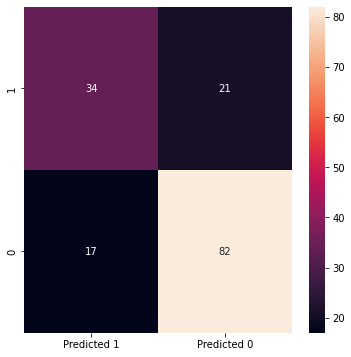

In [15]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])
df_cm = pd.DataFrame(cm, index=[1, 0], columns=['Predicted 1', 'Predicted 0'])

plt.figure(figsize=(6, 6))
sns.heatmap(df_cm, annot=True)
plt.show()

In [17]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       103
           1       0.62      0.67      0.64        51

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.76      0.75      0.76       154



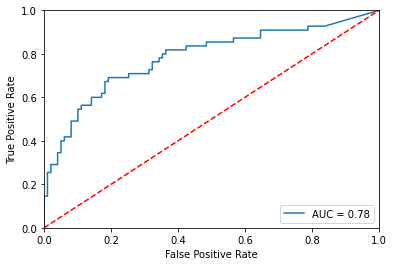

In [20]:
y_scores = knn_clf.predict_proba(x_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_scores[:, 1])
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()